In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## Гамильтониан: 
$H=\omega_q(a^\dagger a+\frac{1}{2})+ \frac{\alpha}{2} a^\dagger a^\dagger a a -{\Omega}cos(w_d t)(a-a^\dagger)$

## Настройка параметров задачи:


In [2]:
wq = 1.0  * 2 * np.pi  # частота кубита
Omega = 0.1  * 2 * np.pi  # сила связи
alpha=0.1  * 2 * np.pi # ангармонизм
wd=1.0  * 2 * np.pi # частота сигнала
tlist = np.linspace(0,30,300)

## Задание начального состояния, гамильтониана, операторов:

In [3]:
#начальное состояние
psi0 = basis(3,1)
# гамильтониан
a  = destroy(3)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

H0 = wq*(a*a.dag()+1/2)+alpha/2*a.dag()*a.dag()*a*a
H1 = -Omega *(a-a.dag())
H = [H0, [H1, 'cos(wd*t)']]
H_args = {'wd': wd}

## Решение:

In [4]:
output = mesolve(H, psi0, tlist,{},[a.dag()*a],H_args)

##  Визуализация:

Text(0, 0.5, 'Населенность возбуждённого уровня')

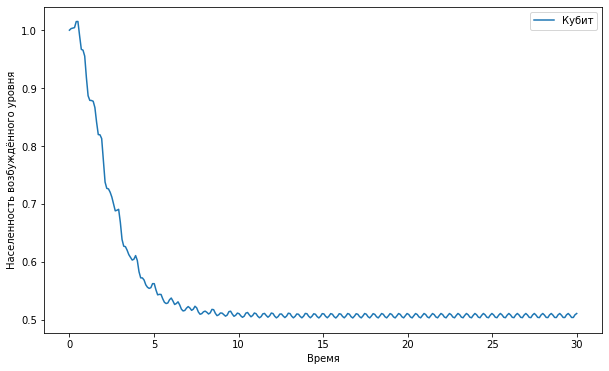

In [7]:
n_c = output.expect[0]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Кубит")

axes.legend(loc=0)
axes.set_xlabel('Время')
axes.set_ylabel('Населенность возбуждённого уровня')